In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing as preproc
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import pdvega

from draco.learn import preprocess
from draco.learn.helper import count_violations, current_weights
from draco.spec import Data, Field

%matplotlib inline

In [2]:
np.random.seed(1)

## Data preparation and learning functions

In [16]:
def prepare_data(data: pd.DataFrame):
    data = shuffle(data)
    
    split = int(len(data)/2)
    
    normal = data[:split]
    inverted = data[split:]
    
    a = normal.positive - normal.negative
    a['Y'] = 1
    
    b = inverted.negative - inverted.positive
    b['Y'] = 0
    
    return pd.concat([a, b]).sort_index()

In [4]:
def learn_weights(X_train, y_train, X_dev, y_dev):

    #clf = sklearn.linear_model.LogisticRegression()
    clf = svm.LinearSVC()
    clf.fit(X_train, y_train)

    #pred = clf.predict(X_dev)
    #score = clf.score(X_dev, y_dev)
    print(clf.score(X_train, y_train))
    print(clf.score(X_dev, y_dev))
    #print(y_test)

    #print(clf.coef_)

    used_feat_idx = [i for i in range(len(clf.coef_[0])) if clf.coef_[0][i] != 0.]

    return used_feat_idx

## Program

In [5]:
data = preprocess.load_data()

In [17]:
df = shuffle(data)
train, dev, test = np.split(df.sample(frac=1), [int(.7*len(df)), int(.8*len(df))])

train_data = df.iloc[:3]

             x         y  cat
0    -1.711984 -0.124079  pos
1    -1.711984 -0.124079  pos
2     0.977692 -1.935692  pos
3    -1.005688 -1.954790  pos
4     0.810849  2.040077  pos
5    -1.711984 -0.124079  pos
6     0.977692 -1.935692  pos
7     0.977692 -1.935692  pos
8     4.181221 -0.974422  pos
9     0.810849  2.040077  pos
10   -1.711984 -0.124079  pos
11   -1.994918 -0.197025  pos
12   -1.711984 -0.124079  pos
13    3.113442  0.005855  pos
14   -1.172532  2.020979  pos
15   -1.711984 -0.124079  pos
16    0.810849  2.040077  pos
17   -1.005688 -1.954790  pos
18    3.396376  0.078800  pos
19   -1.711984 -0.124079  pos
20    3.646016  1.271854  pos
21   -1.711984 -0.124079  pos
22    0.810849  2.040077  pos
23   -1.870075 -0.209524  pos
24   -1.172532  2.020979  pos
25    0.810849  2.040077  pos
26   -1.172532  2.020979  pos
27   -1.994918 -0.197025  pos
28   -1.711984 -0.124079  pos
29    3.396376  0.078800  pos
...        ...       ...  ...
1080 -1.005688 -1.954790  neg
1081  0.81

/usr/local/anaconda3/envs/asp/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda3/envs/asp/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda3/envs/asp/lib/python3.6/site-packages/pdvega/_utils.py:81: UserWarning: Unrecognized keywords in vgplot.scatter(): 'symbol'


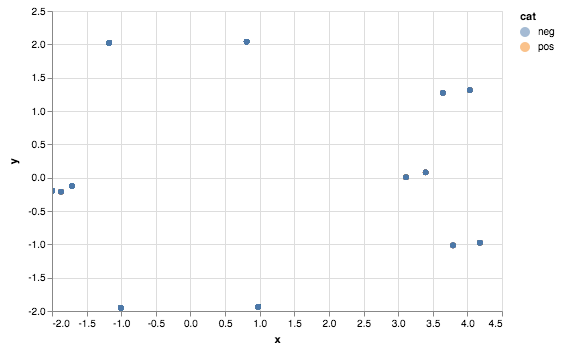

In [18]:
def prepare_plot_raw_data(data: pd.DataFrame):
    pos = data.positive
    pos['cat'] = 'pos'

    neg = data.negative
    neg['cat'] = 'neg'
    
    return pd.concat([pos, neg])

def plot_data(data):
    X = data.drop(columns=['cat'])
    
    pca = PCA(n_components=2)
    X2 = pd.DataFrame(pca.fit_transform(X))
    X2[2] = data.cat.values
    
    X2.columns = ['x', 'y', 'cat']
    
    return X2.vgplot.scatter('x', 'y', c='cat', alpha=0.5, symbol='cat')

plot_data(prepare_plot_raw_data(train))